# Overview

We will be defineing a neural work from the ground up using Numpy.

# Simple Version Multilayer Perceptron

Let's implement a multilayer perceptron 

In [1]:
import numpy as np

class MultilayerPerceptron:
    def __init__(self, architecture):
        self.architecture=architecture
        self.weights=[]
        self.biases=[]

        # Initialize random weights and biases zero
        np.random.seed(99)
        for i in range(len(architecture)-1):
            self.weights.append(np.random.uniform(low=-1, high=1, size=(architecture[i], architecture[i+1])))
            self.biases.append(np.zeros((1, architecture[i+1])))

architecture=[2,64,64,64,1]
model=MultilayerPerceptron(architecture)

print('weight dimensions:')
for w in model.weights:
    print(w.shape)

print('\nbias dimensions:')
for b in model.biases:
    print(b.shape)

weight dimensions:
(2, 64)
(64, 64)
(64, 64)
(64, 1)

bias dimensions:
(1, 64)
(1, 64)
(1, 64)
(1, 1)


# Multilayer Perceptron Pass Input to Each Layer

In [2]:
import numpy as np

class MultilayerPerceptron:
    def __init__(self, architecture):
        self.architecture=architecture
        self.weights=[]
        self.biases=[]

        # tracking the input and outputs for visualization
        self.perceptron_inputs=None
        self.perceptron_ouputs=None

        # initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            # we use numpy generate an array of random numbers drawn from a uniform distribution within a specified range
            self.weights.append(np.random.uniform(
                low=-1, high=1, size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

    @staticmethod
    def relu(x):
        # implementing the relu activation function
        return np.maximum(0,x)

    @staticmethod
    def relu_as_weights(x):
        return (x>0).astype(float)

    def forward(self, X):
        self.perceptron_inputs=[X]
        self.perceptron_outputs=[]
        
        #iterating through all layers
        for W,b in zip(self.weights, self.biases):
            
            # applying the weight and biases of the layer
            # The dot product is a fundamental operation in linear algebra,
            #   for computing the weighed sum fo inputs at each layer.
            Z=np.dot(self.perceptron_inputs[-1], W)+b
            self.perceptron_outputs.append(Z)
            
            #doing ReLU for all but the last layer
            if W is self.weights[-1]:
                A=Z
            else:
                A=self.relu(Z)
            self.perceptron_inputs.append(A)
        
        return self.perceptron_inputs, self.perceptron_outputs 

    def predict(self, x):
        perceptron_inputs, _=self.forward(x)
        return perceptron_inputs[-1].flatten() # convert the output to one-dimensional array


architecture =[2,64,64,64,1]
model=MultilayerPerceptron(architecture)

In [3]:
prediction=model.predict(np.array([0.1,0.2]))

for i, (inpt, outpt) in enumerate(zip(model.perceptron_inputs, model.perceptron_outputs[:-1])):
    print(f'layer {i}')
    print(f'input: {inpt.shape}')
    print(f'output: {outpt.shape}')
    print('')

print('Final Ouput:')
print(model.perceptron_outputs[-1].shape)

layer 0
input: (2,)
output: (1, 64)

layer 1
input: (1, 64)
output: (1, 64)

layer 2
input: (1, 64)
output: (1, 64)

Final Ouput:
(1, 1)


# Creating a Dataset Consisting of Random Points

          X         Y         Z
0  3.445571  4.917359  8.851057
1 -0.238432 -4.594719 -3.886519
2  6.509903  3.368406  8.097718
3 -9.371072  6.061134 -3.101206
4  6.160999  3.071375  6.350257


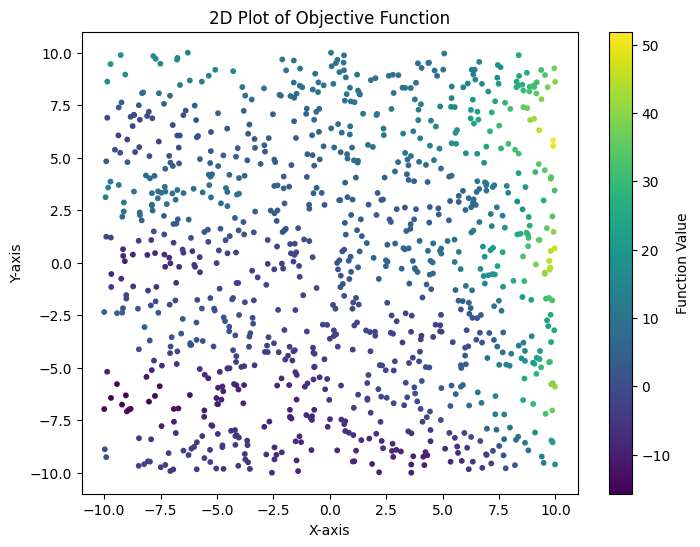

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# define a random funciton with two inputs
def random_function(x,y):
    return (np.sin(x)+x*np.cos(y)+y+3**(x/3))

# define the nunmber of random sampels to generate
n_samples=1000

np.random.seed(99)
# generate a grid of x and y values
x_min, x_max=-10, 10
y_min, y_max=-10, 10

# generate random values fro X and Y
X_random=np.random.uniform(x_min, x_max, n_samples)
Y_random=np.random.uniform(y_min, y_max, n_samples)

# evalute the random function at the genreted X and Y values
Z_random=random_function(X_random, Y_random)


# Create a dataset
dataset=pd.DataFrame({
    'X':X_random,
    'Y':Y_random,
    'Z':Z_random
})

print(dataset.head())


# Create a 2D plot
plt.figure(figsize=(8, 6))
scatter=plt.scatter(dataset['X'],dataset['Y'], c=dataset['Z'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Function Value')
plt.title('2D Plot of Objective Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Multilayer Perceptron With Backpropagation

In [5]:
import numpy as np

class MultilayerPerceptron:
    def __init__(self, architecture):
        self.architecture=architecture
        self.weights=[]
        self.biases=[]

        # tracking the input and outputs for visualization
        self.perceptron_inputs=None
        self.perceptron_ouputs=None

        # initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            # we use numpy generate an array of random numbers drawn from a uniform distribution within a specified range
            self.weights.append(np.random.uniform(
                low=-1, high=1, size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

    @staticmethod
    def relu(x):
        # implementing the relu activation function
        return np.maximum(0,x)

    @staticmethod
    def relu_as_weights(x):
        # relu activation function
        return (x>0).astype(float)

    def forward(self, X):
        self.perceptron_inputs=[X]
        self.perceptron_outputs=[]
        
        #iterating through all layers
        for W,b in zip(self.weights, self.biases):
            
            # applying the weight and biases of the layer
            # The dot product is a fundamental operation in linear algebra,
            #   for computing the weighed sum fo inputs at each layer.
            Z=np.dot(self.perceptron_inputs[-1], W)+b
            self.perceptron_outputs.append(Z)
            
            #doing ReLU for all but the last layer
            if W is self.weights[-1]:
                A=Z
            else:
                A=self.relu(Z)
            self.perceptron_inputs.append(A)
        
        return self.perceptron_inputs, self.perceptron_outputs

    def backward(self, percepton_inputs, perceptron_outputs, target):
        weight_changes=[]
        bias_changes=[]

        # a scaling factor for the batch size.
        # we want changes to be an average across all bacthes so we divide by m once we've aggregated all changes
        m=len(target)
        
        dA=perceptron_inputs[-1]-target.reshape(-1, 1) # output layer gradient or output error

        for i in reversed(range(len(self.weights))):
            # only for the last layer
            dZ=dA if i ==len(self.weights) -1 else dA *self.relu_as_weights(perceptron_outputs[i])

            # calculating change to weights
            # The change in the weight should be equal to the value going into the perceptron, times how much the ooutput should have changed.
            dW=np.dot(perceptron_inputs[i].T, dZ) / m

            # calculating change to bias
            db=np.sum(dZ,axis=0, keepdims=True) / m

            # keeping track of required changes
            weight_changes.append(dW)
            bias_changes.append(db)

            if i>0:
                dA=np.dot(dZ, self.weights[i].T)

        return list(reversed(weight_changes)), list(reversed(bias_changes))

    def predict(self, x):
        perceptron_inputs, _=self.forward(x)
        return perceptron_inputs[-1].flatten() # convert the output to one-dimensional array


architecture =[2,64,64,64,1]
model=MultilayerPerceptron(architecture)

# defining a sample input and target output
inpt=np.array([[0.1, 0.2]])
desired_output=np.array([0.5])

#doing forward and backward pass to calculate changes
perceptron_inputs, perceptron_outputs=model.forward(inpt)
weight_changes, bias_changes=model.backward(perceptron_inputs, perceptron_outputs, desired_output)

# smaller numbers for printing
np.set_printoptions(precision=2)

for i, (layer_weights, layer_biases, layer_weight_changes, layer_bias_changes) in enumerate(zip(model.weights, model.biases, weight_changes, bias_changes)):
    print(f'layer {i}')
    print(f'weight matrix: {layer_weights.shape}')
    print(f'weight matrix changes: {layer_weight_changes.shape}')
    print(f'bias matrix: {layer_biases.shape}')
    print(f'bias matrix changes: {layer_bias_changes.shape}')
    print('')

print('The weight and weight change matrix of the second layer')
print('weight matrix:')
print(model.weights[1])
print('change matrix:')
print(weight_changes[1])

layer 0
weight matrix: (2, 64)
weight matrix changes: (2, 64)
bias matrix: (1, 64)
bias matrix changes: (1, 64)

layer 1
weight matrix: (64, 64)
weight matrix changes: (64, 64)
bias matrix: (1, 64)
bias matrix changes: (1, 64)

layer 2
weight matrix: (64, 64)
weight matrix changes: (64, 64)
bias matrix: (1, 64)
bias matrix changes: (1, 64)

layer 3
weight matrix: (64, 1)
weight matrix changes: (64, 1)
bias matrix: (1, 1)
bias matrix changes: (1, 1)

The weight and weight change matrix of the second layer
weight matrix:
[[ 0.41 -0.2   0.24 ... -0.77 -0.7   0.22]
 [ 0.69 -0.13 -0.07 ...  0.95 -0.77 -0.18]
 [ 0.57  0.23  0.41 ...  0.4  -0.45 -0.85]
 ...
 [-0.7  -0.07 -0.31 ... -0.68 -0.01  0.5 ]
 [-0.73 -0.95  0.67 ... -0.32  0.85  0.05]
 [ 0.8   0.24  0.33 ...  0.77 -0.67 -0.77]]
change matrix:
[[-0.    0.   -0.   ...  0.05 -0.   -0.07]
 [-0.    0.   -0.   ...  0.   -0.   -0.  ]
 [-0.    0.   -0.   ...  0.   -0.   -0.  ]
 ...
 [-0.    0.   -0.   ...  0.03 -0.   -0.04]
 [-0.    0.   -0.  